<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Classification with Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season

### Load Data From CSV File  

Let's load the dataset [NB Need to provide link to csv file]

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing

Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.

In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

POSTSEASON
S16    32
E8     16
F4      8
Name: count, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 

Lets plot some columns to underestand the data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2




C:\Users\Marco\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


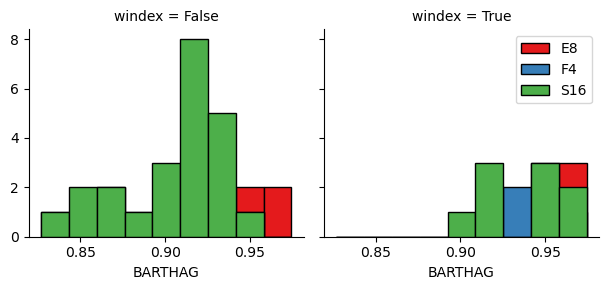

In [8]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

C:\Users\Marco\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


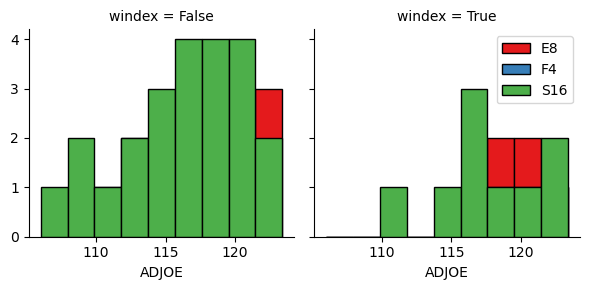

In [9]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at how Adjusted Defense Efficiency plots

C:\Users\Marco\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


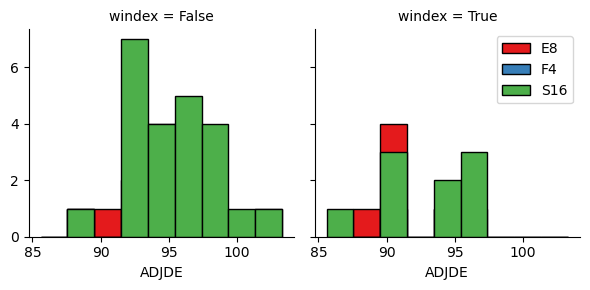

In [10]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that this data point doesn't impact the ability of a team to get into the Final Four. 

## Convert Categorical features to numerical values


Lets look at the postseason:

In [11]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: proportion, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.

Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:

In [12]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_61508\1994287662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection

Let's define feature sets, X:

In [13]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [14]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data 

Data Standardization gives data zero mean and unit variance (technically should be done after train test split )

In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation 

Split the data into Training and Validation data.

In [16]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [42]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [43]:
yhat = neigh.predict(X_val)
yhat[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_val, yhat))

Train set Accuracy:  0.6363636363636364
Test set Accuracy:  0.6666666666666666


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:

In [21]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

mean_acc

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333])

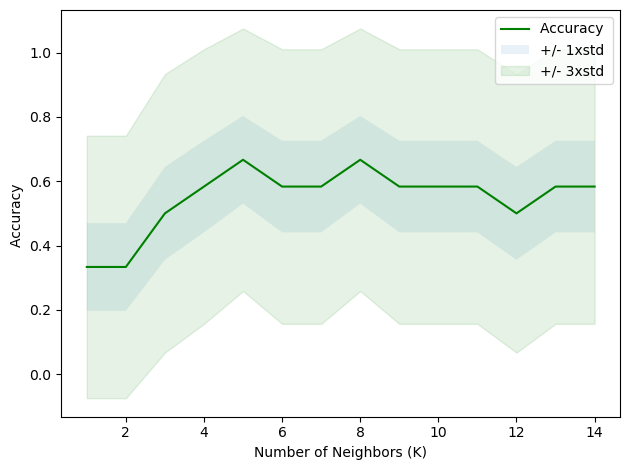

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6666666666666666 with k= 5


# Decision Tree

The following lines of code fit a <code>DecisionTreeClassifier</code>:

In [24]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el rango de valores de max_depth a probar
param_grid = {
    'max_depth': range(1, 21)  # Probar profundidades de 1 a 20
}

# Configurar la búsqueda en cuadrícula (GridSearchCV)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejor valor de max_depth:", grid_search.best_params_['max_depth'])

Mejor valor de max_depth: 3


El mejor max_depth es 3


In [63]:
gameTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
gameTree


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
gameTree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Support Vector Machine

<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [27]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat_l = clf2.predict(X_val)
print("Avg F1-score: %.4f" % f1_score(y_val, yhat_l, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(y_val,yhat2,pos_label=2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat_l)
np.set_printoptions(precision=2)

print (classification_report(y_val, yhat_l))

Avg F1-score: 0.2422
              precision    recall  f1-score   support

          E8       0.14      0.50      0.22         2
          F4       0.00      0.00      0.00         2
         S16       0.40      0.25      0.31         8

    accuracy                           0.25        12
   macro avg       0.18      0.25      0.18        12
weighted avg       0.29      0.25      0.24        12



C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print(clf2.predict(X_val))

print(y_val)

['S16' 'E8' 'S16' 'E8' 'E8' 'E8' 'S16' 'S16' 'E8' 'S16' 'E8' 'E8']
['F4' 'S16' 'S16' 'S16' 'S16' 'E8' 'S16' 'F4' 'S16' 'E8' 'S16' 'S16']


In [30]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat_l = clf2.predict(X_val)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_val, yhat_l))

Train set Accuracy:  0.9318181818181818
Test set Accuracy:  0.25


In [70]:
clf2_p = svm.SVC(kernel='poly')
clf2_p.fit(X_train, y_train) 
yhat_p = clf2_p.predict(X_val)
print("Avg F1-score: %.4f" % f1_score(y_val, yhat_p, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(y_val,yhat2,pos_label=2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat_p)
np.set_printoptions(precision=2)

print (classification_report(y_val, yhat_p))

Avg F1-score: 0.5333
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.22      0.33      0.27        12
weighted avg       0.44      0.67      0.53        12



C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train) 
yhat_rbf = clf2.predict(X_val)
print("Avg F1-score: %.4f" % f1_score(y_val, yhat_rbf, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(y_val,yhat2,pos_label=2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat_rbf)
np.set_printoptions(precision=2)

print (classification_report(y_val, yhat_rbf))

Avg F1-score: 0.4912
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.21      0.29      0.25        12
weighted avg       0.42      0.58      0.49        12



C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
clf2 = svm.SVC(kernel='sigmoid')
clf2.fit(X_train, y_train) 
yhat_s = clf2.predict(X_val)
print("Avg F1-score: %.4f" % f1_score(y_val, yhat_s, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(y_val,yhat2,pos_label=2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat_s)
np.set_printoptions(precision=2)

print (classification_report(y_val, yhat_s))

Avg F1-score: 0.5373
              precision    recall  f1-score   support

          E8       0.33      0.50      0.40         2
          F4       0.00      0.00      0.00         2
         S16       0.67      0.75      0.71         8

    accuracy                           0.58        12
   macro avg       0.33      0.42      0.37        12
weighted avg       0.50      0.58      0.54        12



C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
set(yhat_rbf)

{'E8', 'S16'}

# Logistic Regression

<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_val)
yhat_lr

array(['F4', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16', 'F4', 'E8', 'S16',
       'S16', 'S16'], dtype=object)

In [79]:
print (classification_report(y_val, yhat_lr))

              precision    recall  f1-score   support

          E8       0.20      0.50      0.29         2
          F4       1.00      1.00      1.00         2
         S16       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.67      0.67      0.63        12
weighted avg       0.73      0.58      0.62        12



# Model Evaluation using Test set

In [82]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [83]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**

In [ ]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))

### Load Test set for evaluation 

In [46]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv')
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [47]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\Marco\AppData\Local\Temp\ipykernel_61508\3609998696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


array([[-4.08e-01, -1.10e+00,  3.37e-01,  2.66e+00, -2.47e+00,  2.14e-01,
         9.44e-01, -1.19e+00, -1.64e+00,  1.45e-02,  1.30e+00, -6.24e-01,
        -9.32e-01,  1.43e-01,  1.69e-01,  2.85e-01,  1.63e+00, -8.37e-01,
        -9.99e-01,  4.84e-01, -6.77e-01],
       [ 3.64e-01,  3.26e-01,  7.03e-01, -7.14e-01,  1.07e+00,  4.83e-01,
         4.77e-01, -1.33e+00, -6.86e-02, -7.35e-01, -1.35e+00, -8.07e-01,
         3.42e-01,  4.97e-02,  9.41e-02,  1.37e+00,  6.94e-01, -2.01e+00,
         9.81e-01, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  1.18e+00,  9.32e-01, -8.79e-01,  1.24e+00,  7.85e-01,
        -9.22e-01,  5.28e-01, -1.87e-01, -1.19e-01, -3.18e-01,  6.82e-01,
         1.01e+00,  8.07e-02, -9.91e-01,  1.75e+00, -2.39e-01,  6.61e-01,
         1.92e+00, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  6.12e-01,  3.60e-01,  7.15e-01, -8.92e-02, -3.58e-01,
         6.90e-01, -6.42e-01,  4.83e-01,  3.90e-01,  6.81e-01,  1.07e+00,
         1.01e-01,  4.97e-02,  1.92e-02, -8.41e-01,  1.33e+0

In [50]:
test_y = test_df1['POSTSEASON'].values
test_y

array([[-0.41, -1.1 ,  0.34, ..., -1.  ,  0.48, -0.68],
       [ 0.36,  0.33,  0.7 , ...,  0.98, -1.19,  1.48],
       [ 0.36,  1.18,  0.93, ...,  1.92, -1.19,  1.48],
       ...,
       [-1.18, -0.82, -1.49, ..., -0.43,  0.15, -0.68],
       [-1.95,  0.33, -0.58, ..., -0.4 ,  0.82, -0.68],
       [ 0.36, -1.39, -0.26, ..., -1.31,  0.48, -0.68]])

KNN

In [51]:
yhat_knn = neigh.predict(test_X)

yhat_knn

array(['S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16', 'E8',
       'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8', 'S16', 'E8', 'S16',
       'E8', 'E8', 'F4', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8',
       'S16', 'S16', 'E8', 'S16', 'E8', 'E8', 'E8', 'F4', 'E8', 'S16',
       'S16', 'F4', 'F4', 'E8', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16',
       'E8', 'S16', 'E8', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8'],
      dtype=object)

In [62]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_knn))
print("Avg F1-score: %.4f" % f1_score(test_y, yhat_knn, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='macro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='samples'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='binary'))



Test set Accuracy:  0.6285714285714286
Avg F1-score: 0.6286
Jaccard score: 0.4583
Jaccard score: 0.3819
Jaccard score: 0.4643


Decision Tree

In [66]:
yhat_tree = gameTree.predict(test_X)

yhat_tree

array(['S16', 'E8', 'E8', 'E8', 'S16', 'F4', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16', 'E8', 'F4', 'S16',
       'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'F4', 'E8',
       'E8', 'S16', 'E8', 'F4', 'S16', 'S16', 'F4', 'S16', 'F4', 'S16',
       'E8', 'F4', 'E8', 'S16', 'E8', 'E8', 'F4', 'F4', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8', 'F4', 'S16', 'F4',
       'E8', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8'],
      dtype=object)

In [67]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_tree))
print("Avg F1-score: %.4f" % f1_score(test_y, yhat_tree, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_tree, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_tree, average='macro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_tree, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='samples'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='binary'))


Test set Accuracy:  0.7
Avg F1-score: 0.7000
Jaccard score: 0.5385
Jaccard score: 0.4692
Jaccard score: 0.5526


SVM

In [72]:
yhat_p = clf2_p.predict(test_X)

yhat_p

array(['E8', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16',
       'S16', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'F4', 'S16', 'S16',
       'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16', 'E8',
       'F4', 'F4', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16', 'S16',
       'E8', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16', 'S16', 'S16', 'S16',
       'S16', 'E8', 'S16', 'S16'], dtype=object)

In [73]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_p))
print("Avg F1-score: %.4f" % f1_score(test_y, yhat_p, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_p, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_p, average='macro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_p, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='samples'))
#print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='binary'))


Test set Accuracy:  0.6857142857142857
Avg F1-score: 0.6857
Jaccard score: 0.5217
Jaccard score: 0.4258
Jaccard score: 0.4935


Logistic Regression

In [86]:
yhat_lr = LR.predict(test_X)


yhat_lr_prob = LR.predict_proba(test_X)
yhat_lr

array(['S16', 'S16', 'E8', 'E8', 'F4', 'S16', 'E8', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'S16', 'E8', 'S16', 'E8', 'E8', 'F4', 'F4',
       'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8', 'S16', 'E8', 'S16',
       'F4', 'E8', 'F4', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8',
       'S16', 'S16', 'E8', 'S16', 'E8', 'E8', 'E8', 'F4', 'E8', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'E8', 'E8',
       'E8', 'S16', 'E8', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16'],
      dtype=object)

In [87]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_lr))
print("Avg F1-score: %.4f" % f1_score(test_y, yhat_lr, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_lr, average='micro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_lr, average='macro'))
print("Jaccard score: %.4f" % jaccard_score(test_y, yhat_lr, average='weighted'))
print("Log Loss: %.4f" % log_loss(test_y, yhat_lr_prob))


Test set Accuracy:  0.6857142857142857
Avg F1-score: 0.6857
Jaccard score: 0.5217
Jaccard score: 0.4943
Jaccard score: 0.5314
Log Loss: 1.0372


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [ ]:
| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                | 62.85    |   46.43  |  62.86    | NA      |
| Decision Tree      |    70    |   55.26  |    70     | NA      |
| SVM                |   68.57  |   52.17  |   68.57   | NA      |
| LogisticRegression |   68.57  |   53.14  |   68.57   | 103.72  |

In [ ]:
-